In [7]:
import pandas as pd

df = pd.read_csv('Paraphrase.csv')

In [8]:
df.describe()

,label_1,label_2,label_3,avg_score
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,3.577000,3.612000,3.597000,3.595333
std,1.261611,1.222682,1.217404,0.794417
min,1.000000,1.000000,1.000000,1.000000
25%,3.000000,3.000000,3.000000,3.000000
50%,4.000000,4.000000,4.000000,3.666667
75%,5.000000,5.000000,5.000000,4.333333
max,5.000000,5.000000,5.000000,5.000000


In [9]:
df['score'] = df['avg_score']/5
df.drop(columns=['label_1','label_2','label_3','avg_score'],inplace=True)
df

,text_1,text_2,score
0,take measures in order to,take additional measures to,0.800000
1,was seeking to,will strive to,0.600000
2,canada aims to,canada works to,0.466667
3,refugees and,refugee population,0.533333
4,measures and,"instruments , and",0.600000
...,...,...,...
995,unless specified otherwise,unless specifically stated otherwise,0.933333
996,its efforts to combat,the area of combating,0.733333
997,considered by the,give consideration to the,0.866667
998,an enlarged security,an expanded security,0.800000


In [10]:
new_df = pd.read_csv('combined_data.csv')
new_df = new_df.sample(frac=0.01, random_state=42)
new_df

,text_1,text_2,label
679825,"Embree and Sons boatyard in Port Hawkesbury, N...",What are some standard illustrations of peer p...,0
277092,"In 1919, following the Treaty of Versailles, t...","Following the Treaty of Versailles in 1919, th...",1
431433,What are the applications of collection framew...,How do Abraham Lincoln and Barack Obama compar...,0
125261,I want to be good at English in 6 months. What...,What actions should I take to achieve fluency ...,1
366410,It will also bring chilly temperatures and pos...,Single-digit temperatures could be a possibili...,1
...,...,...,...
192953,Is Python good for making apps?,Does Python have the capacity to build applica...,1
736135,"However, the problem of Allied forces surround...",Define literacy in the context of India and as...,0
334116,Tuition at KU is 13 percent below the national...,The College Board has found that KU's tuition ...,1
365402,The amount each plaintiff receives will depend...,Meunier stated that the amount each plaintiff ...,1


<Axes: >

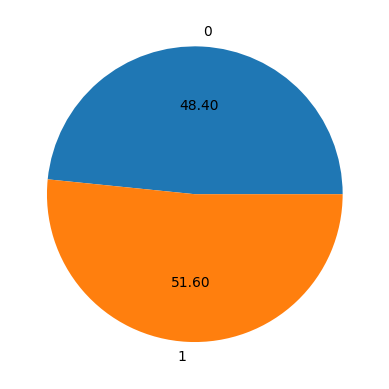

In [11]:
import matplotlib.pyplot as plt

new_df.groupby('label').size().plot(kind='pie', autopct='%.2f')

In [12]:
# Split into texts and labels
texts_1 = new_df['text_1'].tolist()
texts_2 = new_df['text_2'].tolist()
labels = new_df['label'].tolist()

In [15]:
from transformers import AutoTokenizer, AutoModel

model_name = 'sentence-transformers/paraphrase-mpnet-base-v2'
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModel.from_pretrained(model_name)


In [16]:
def preprocess(texts_1, texts_2):
    encodings = tokenizer(texts_1, texts_2, truncation=True, padding=True, max_length=128)
    return encodings

# Tokenize the dataset
encodings = preprocess(texts_1, texts_2)


In [ ]:
import torch

# Convert to tensor
input_ids = torch.tensor(encodings['input_ids'])
attention_mask = torch.tensor(encodings['attention_mask'])

# Forward pass to get embeddings
with torch.no_grad():
    outputs = model(input_ids, attention_mask=attention_mask)

# Get the sentence embeddings (mean of token embeddings)
embeddings_1 = outputs.last_hidden_state.mean(dim=1)
embeddings_2 = outputs.last_hidden_state.mean(dim=1)


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

similarity = cosine_similarity(embeddings_1.numpy(), embeddings_2.numpy())


In [ ]:
import numpy as np

# Choose a threshold for similarity
threshold = 0.2  # Adjust as needed

# Predict labels based on similarity
predictions = (similarity > threshold).astype(int)

# Compare with true labels
accuracy = np.mean(predictions.flatten() == labels)
print(f"Accuracy: {accuracy:.4f}")


In [5]:
import pandas as pd
df = pd.read_csv('C:/Users/harsh/Downloads/test.tsv')
df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/harsh/Downloads/test.tsv'